XGBoost Feature Importance


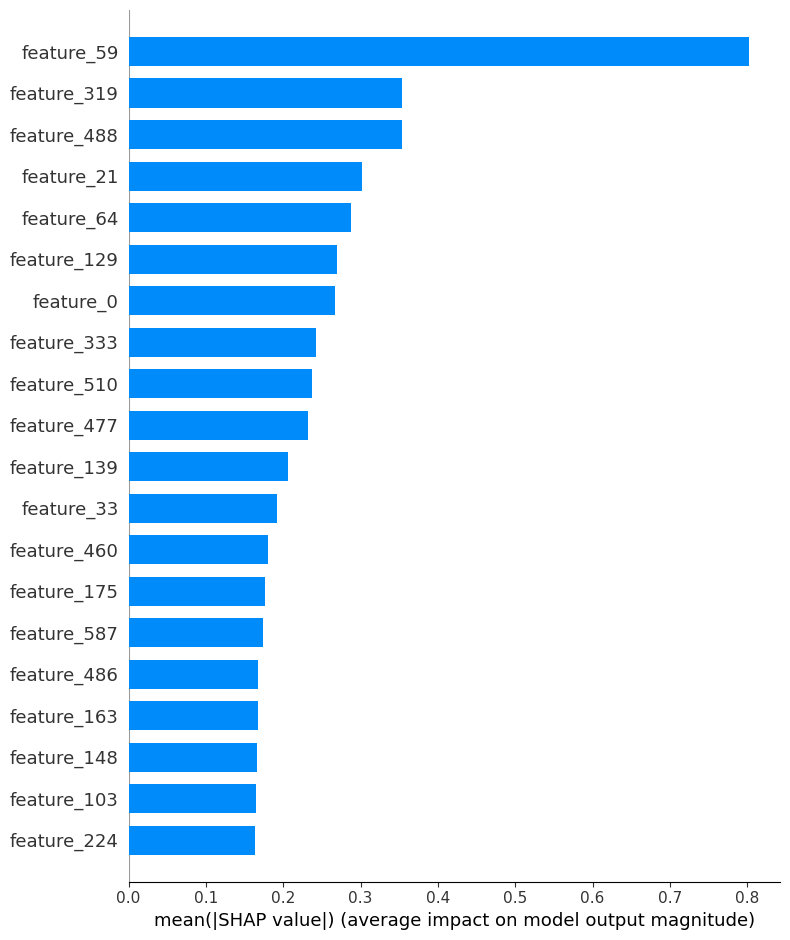

Random Forest Feature Importance


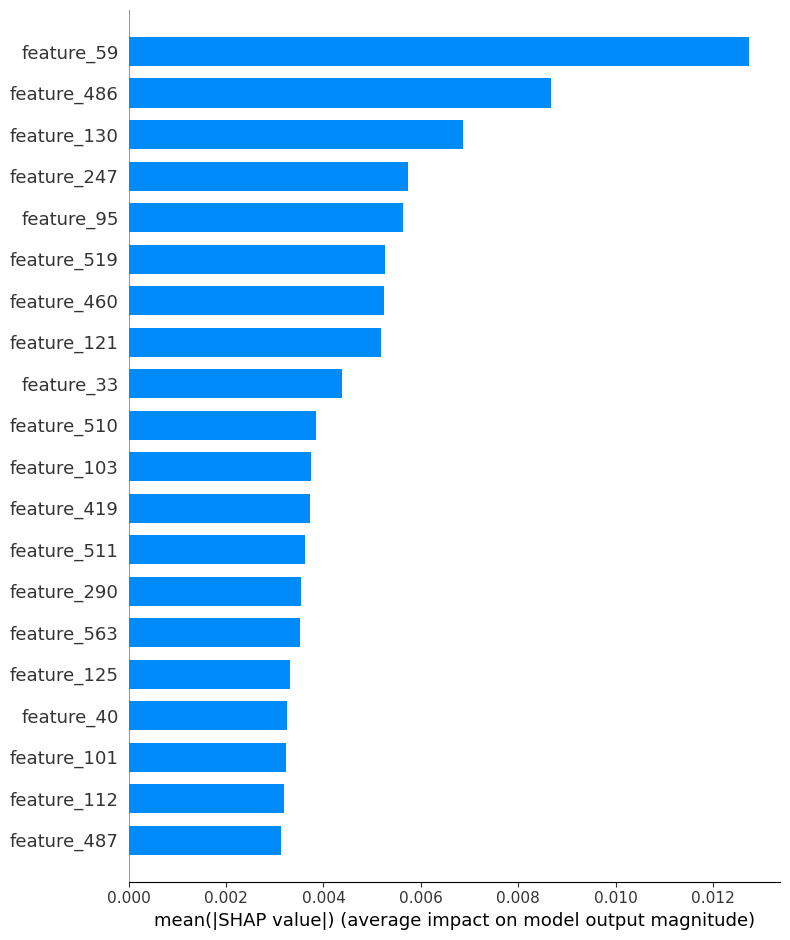

In [4]:
# 1. Imports
import pandas as pd
import shap
import joblib
import numpy as np
import matplotlib.pyplot as plt

# 2. Load data (same as before)
df_data = pd.read_csv('C:/Users/ammar/SHAP_ML/datasets/secom.data', sep=' ', header=None)
df_labels = pd.read_csv('C:/Users/ammar/SHAP_ML/datasets/secom_labels.data', sep=' ', header=None)
df_data.columns = [f'feature_{i}' for i in range(df_data.shape[1])]
df_data['label'] = df_labels[0]

missing = df_data.isna().sum()
df_clean = df_data.loc[:, missing < df_data.shape[0] * 0.5].copy()
df_clean = df_clean.fillna(df_clean.mean())

X = df_clean.drop(columns=['label'])
y = df_clean['label'].replace(-1, 0)

# Split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Load models
rf_model = joblib.load('C:/Users/ammar/SHAP_ML/models/secom_randomforest.pkl')
xgb_model = joblib.load('C:/Users/ammar/SHAP_ML/models/secom_xgboost.pkl')

# 4. SHAP for XGBoost
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)

# 5. SHAP for Random Forest
rf_explainer = shap.TreeExplainer(rf_model, X_train, model_output="raw")
rf_shap_values = rf_explainer.shap_values(X_test)

# 6. Plots

# XGBoost summary
print("XGBoost Feature Importance")
shap.summary_plot(xgb_shap_values, X_test, plot_type='bar')

# Random Forest summary
print("Random Forest Feature Importance")
shap.summary_plot(rf_shap_values[:, :, 1], X_test, plot_type='bar')

# 7. Comparison Table
xgb_importance = pd.Series(np.abs(xgb_shap_values).mean(axis=0), index=X_test.columns).sort_values(ascending=False)
rf_importance = pd.Series(np.abs(rf_shap_values[:, :, 1]).mean(axis=0), index=X_test.columns).sort_values(ascending=False)

comparison_df = pd.DataFrame({
    'XGBoost': xgb_importance.head(10),
    'Random Forest': rf_importance.head(10)
})
comparison_df

# Save SECOM SHAP values for reuse
pd.DataFrame(xgb_shap_values, columns=X_test.columns).to_csv("C:/Users/ammar/SHAP_ML/outputs/shap_secom_xgb.csv", index=False)
pd.DataFrame(rf_shap_values[:, :, 1], columns=X_test.columns).to_csv("C:/Users/ammar/SHAP_ML/outputs/shap_secom_rf.csv", index=False)

In [6]:
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_test)

rf_explainer = shap.TreeExplainer(rf_model, X_train, model_output="raw")
rf_shap_values = rf_explainer.shap_values(X_test)


XGBoost SHAP Beeswarm


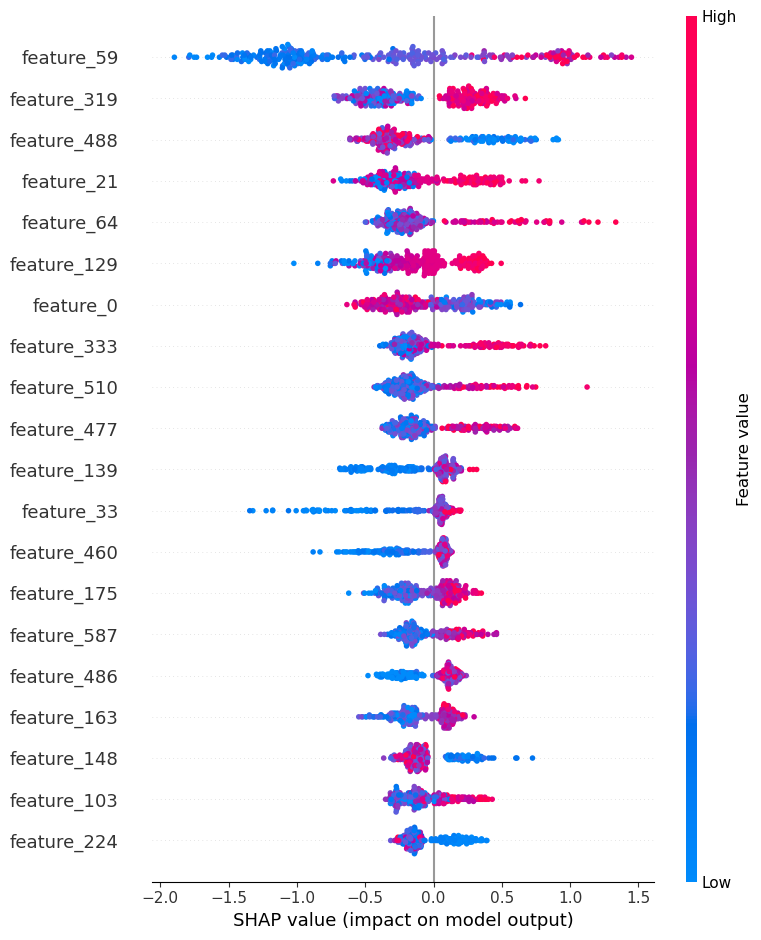


Random Forest SHAP Beeswarm


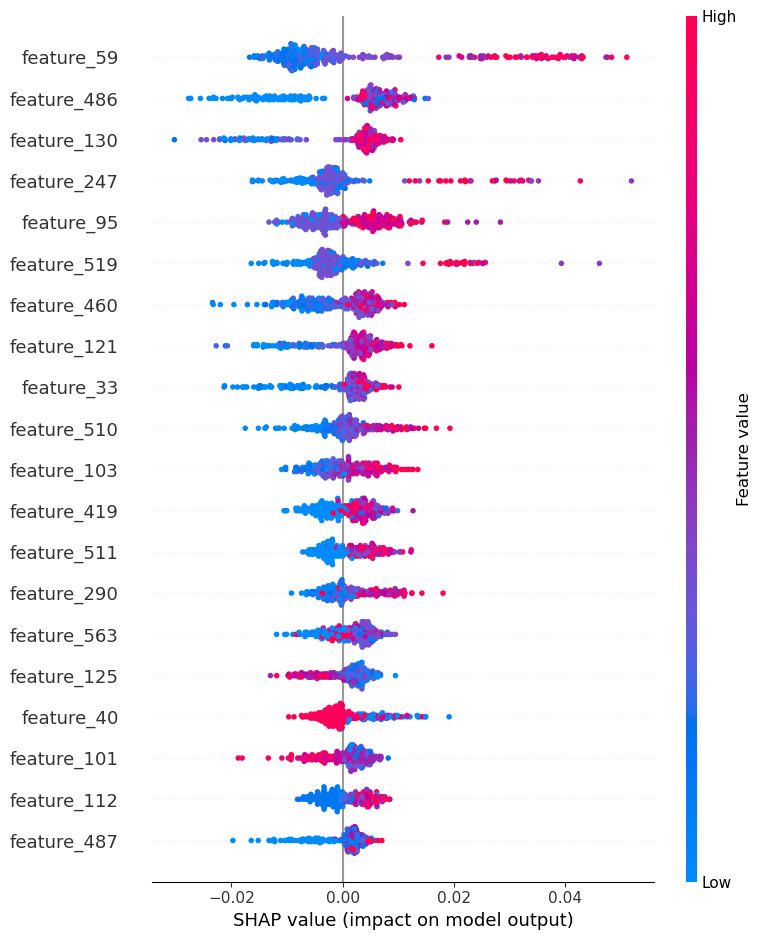

In [7]:
# Beeswarm
print("\nXGBoost SHAP Beeswarm")
shap.summary_plot(xgb_shap_values, X_test)

print("\nRandom Forest SHAP Beeswarm")
shap.summary_plot(rf_shap_values[:, :, 1], X_test)


XGBoost SHAP Beeswarm


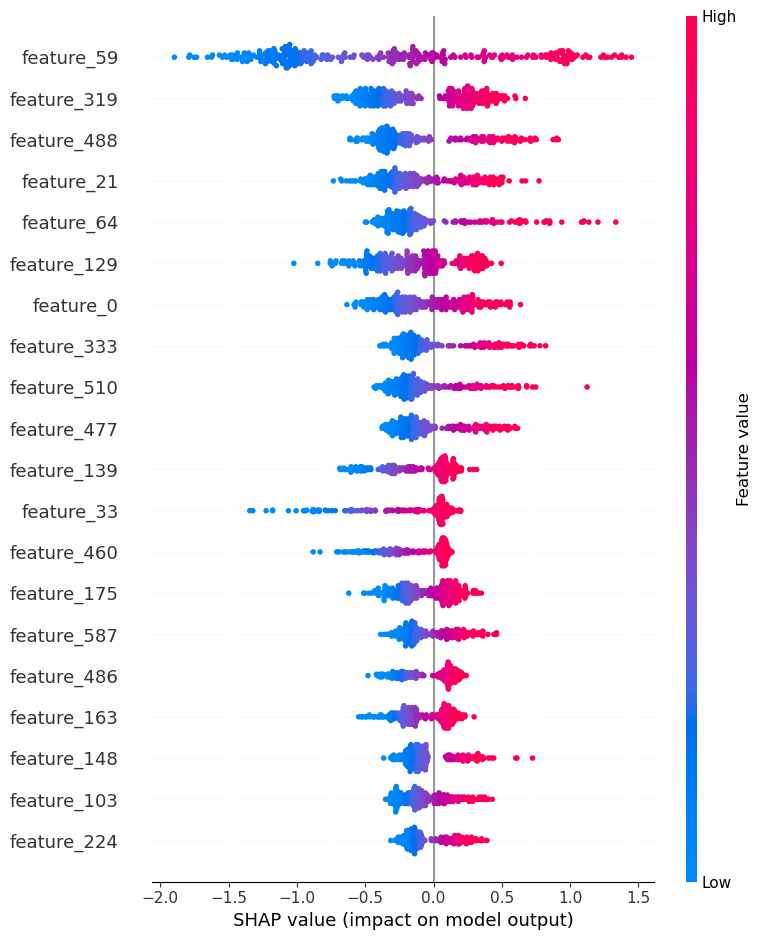


Random Forest SHAP Beeswarm


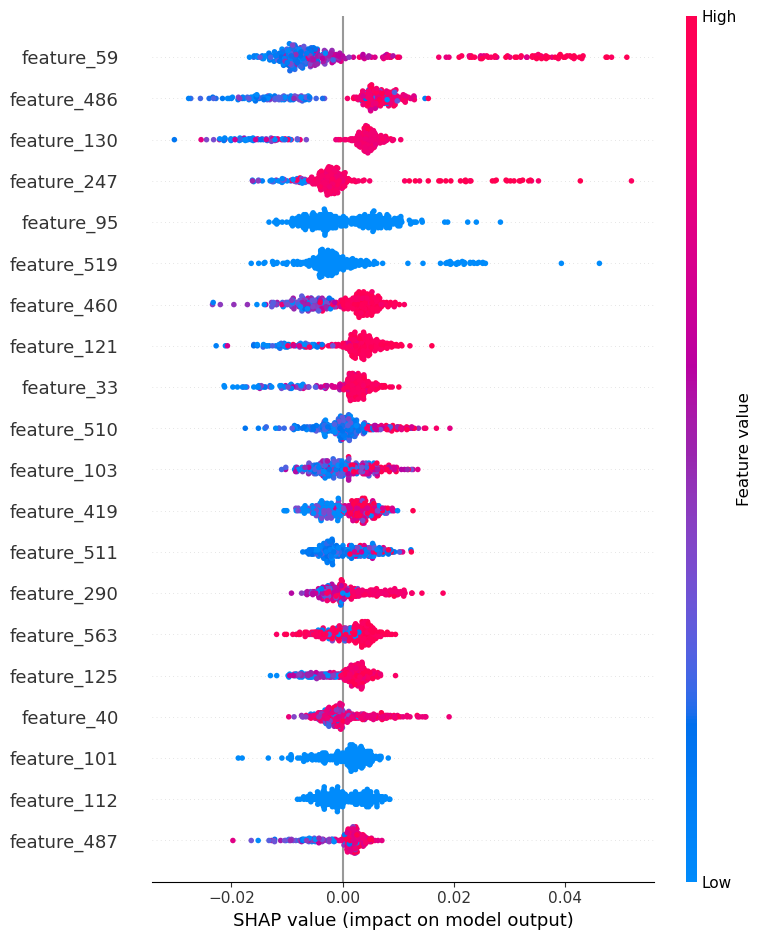

In [19]:
# XGBoost SHAP Beeswarm (Save as PNG)
print("\nXGBoost SHAP Beeswarm")
plt.figure()
shap.summary_plot(xgb_shap_values, X_test, show=False)
plt.tight_layout()
plt.savefig("C:/Users/ammar/SHAP_ML/visuals/xgb_secom_beeswarm.png", dpi=300)
plt.show()

# Random Forest SHAP Beeswarm (Save as PNG)
print("\nRandom Forest SHAP Beeswarm")
plt.figure()
shap.summary_plot(rf_shap_values[:, :, 1], X_test, show=False)
plt.tight_layout()
plt.savefig("C:/Users/ammar/SHAP_ML/visuals/rf_secom_beeswarm.png", dpi=300)
plt.show()

In [1]:
# 1. Imports
import pandas as pd
import shap
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Load data
df_data = pd.read_csv('C:/Users/ammar/SHAP_ML/datasets/secom.data', sep=' ', header=None)
df_labels = pd.read_csv('C:/Users/ammar/SHAP_ML/datasets/secom_labels.data', sep=' ', header=None)
df_data.columns = [f'feature_{i}' for i in range(df_data.shape[1])]
df_data['label'] = df_labels[0]

# Drop features with too much missing data
missing = df_data.isna().sum()
df_clean = df_data.loc[:, missing < df_data.shape[0] * 0.5].copy()
df_clean = df_clean.fillna(df_clean.mean())

# Feature matrix and labels
X = df_clean.drop(columns=['label'])
y = df_clean['label'].replace(-1, 0)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Load XGBoost model
xgb_model = joblib.load('C:/Users/ammar/SHAP_ML/models/secom_xgboost.pkl')

# 4. SHAP: TreeExplainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# 5. Plot top 10 SHAP features (bar plot)
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type='bar', max_display=10, show=False)
plt.title("SECOM - XGBoost Top 10 SHAP Features")
plt.savefig("C:/Users/ammar/SHAP_ML/outputs/secom_shap_bar_top10.png", bbox_inches="tight", dpi=300)
plt.close()